<a href="https://colab.research.google.com/github/ValdirDeJesus/ProjetoImersaoAluraGoogleAvaliacao/blob/main/PROJETO_IMERS%C3%83O_IA_ALURA_%2B_GOOGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALANDO BIBLIOTECAS**

In [ ]:
!pip install -q -U google-generativeai
!pip install opencv-python

***SETUP API KEY ***

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import time
import matplotlib.pyplot as plt
from PIL import Image

import google.generativeai as genai
from google.colab import userdata

api_key = userdata.get('SECRET_KEY')
genai.configure(api_key = api_key)

**INICIALIZANDO O MODELO**

In [ ]:
model_vision = genai.GenerativeModel('gemini-pro-vision')
model_text = genai.GenerativeModel('gemini-pro')

**GERANDO LISTA DE OBJETOS CONTIDOS EM FRAMES PERIÓDICOS COLETADOS VIA WEBCAM**

Digite a duração do loop (em segundos): 30


<IPython.core.display.Javascript object>

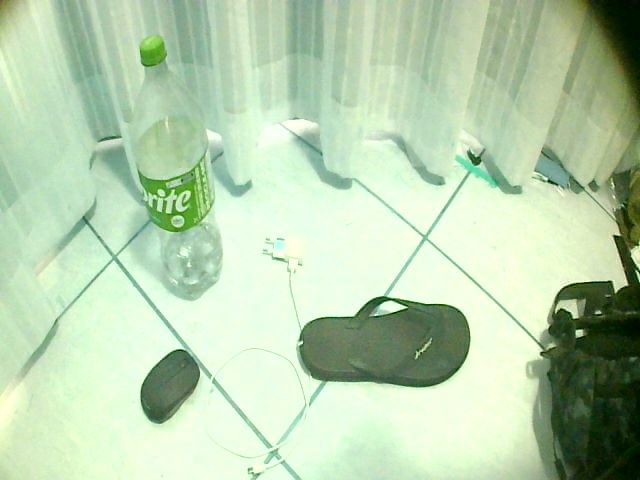

 ['Garrafa de Sprite', 'Chinelo', 'Mouse', 'Cabo USB', 'Mochila']
[" ['Garrafa de Sprite', 'Chinelo', 'Mouse', 'Cabo USB', 'Mochila']"]


<IPython.core.display.Javascript object>

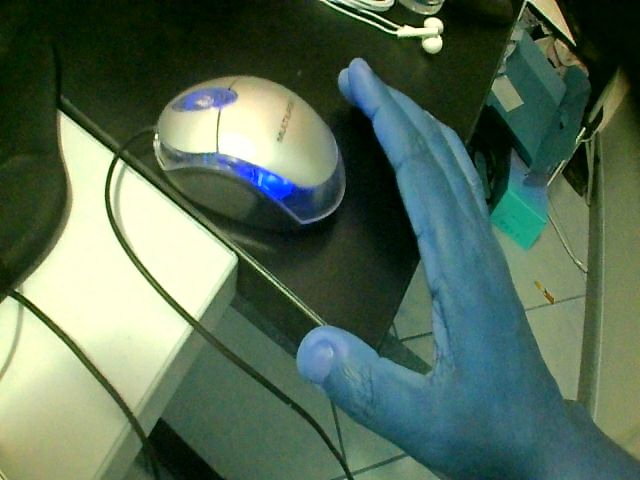

 ['mouse', 'mão']
[" ['Garrafa de Sprite', 'Chinelo', 'Mouse', 'Cabo USB', 'Mochila']", " ['mouse', 'mão']"]
O tempo limite foi atingido.


In [9]:
# Input do tempo limite determinado pelo usuário final
tempo_limite = float(input("Digite a duração do loop (em segundos): "))

# Gerando função para extração dos frames periódicos
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');


      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Redimensiona a saída para se ajustar ao elemento de vídeo
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Inicializando variáveis do while
valores =[]
inicio = time.time()

while True:
  # Tira uma foto
  filename = take_photo()

  # Exibe a foto com os objetos detectados
  ndarray = cv2.imread(filename)
  frame = Image.fromarray(ndarray.astype('uint8'), 'RGB')
  display(frame)
  response = model_vision.generate_content(["Crie uma lista com os objetos dessa imagem (crie tal lista em formato de lista do Python)",frame])

  # Imprime listas
  print(response.text)
  valores = valores + [response.text]
  print(valores)
  # Aguarda 10 segundos
  time.sleep(10)

  # Finaliza a execução do código com base no tempo limite
  if time.time() - inicio > tempo_limite:
        print("O tempo limite foi atingido.")
        break

**ORGANIZANDO A LISTA DE OUTPUT**

In [10]:
lista_organizada = []
for item in valores:
  # Remove espaços em branco e aspas extras
  elementos = [elemento.strip(" '") for elemento in item[2:-2].split(',')]
  lista_organizada.extend(elementos)

for i in range(len(lista_organizada)):
    lista_organizada[i] = lista_organizada[i].lower()
print(lista_organizada)
print(len(lista_organizada))

['garrafa de sprite', 'chinelo', 'mouse', 'cabo usb', 'mochila', 'mouse', 'mão']
7


**GERANDO UM GRÁFICO DE FREQUÊNCIAS DE OCORRÊNCIAS**

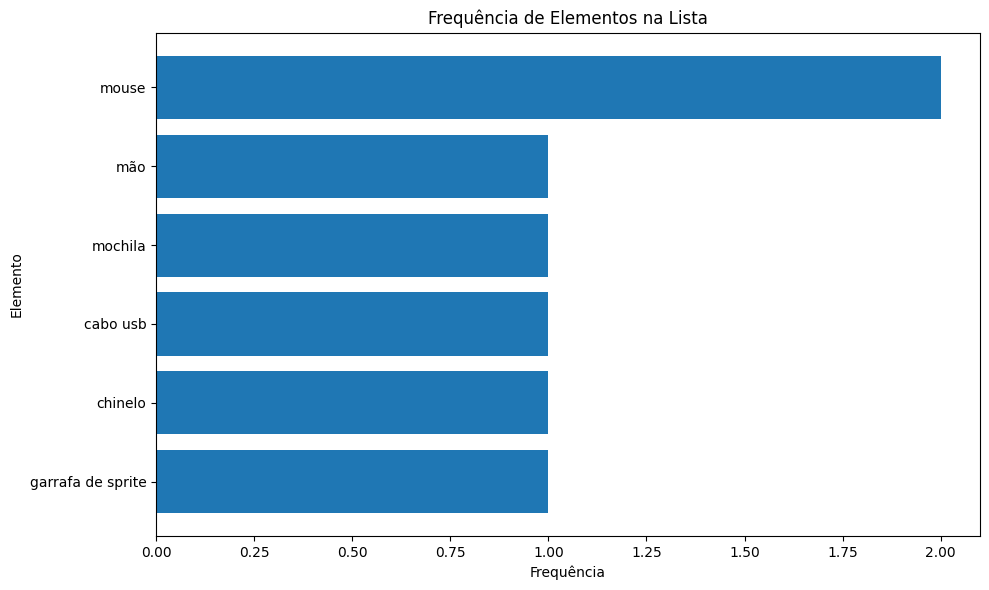

In [12]:
contagem_elementos = {}
for elemento in lista_organizada:
  if elemento in contagem_elementos:
    contagem_elementos[elemento] += 1
  else:
    contagem_elementos[elemento] = 1

# Ordenar os elementos por frequência (decrescente)
itens_ordenados = sorted(contagem_elementos.items(), key=lambda item: item[1], reverse=False)

# Criar um gráfico de barras horizontal
plt.figure(figsize=(10, 6))  # Ajustar o tamanho da figura conforme necessário
plt.barh([item[0] for item in itens_ordenados], [item[1] for item in itens_ordenados])

plt.xlabel('Frequência')
plt.ylabel('Elemento')
plt.title('Frequência de Elementos na Lista')
plt.tight_layout()
plt.show()